## Series of three uncoated lenses
This example shows an optical system consisting of a source, three uncoated lenes in series and a detector. Since this is an axially symmetric system, Mueller matrix for the on-axis field would be identity matrix.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
sys.path.append('..')
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
Source_analysis = pap.Source(10000, Clear=40)                               # Source for ray analysis
Source_analysis.translateOrigin(z=-100)                                 # Adjust source position
#
Source_display = pap.Source(20, Clear=40)                                   # Source for ray display
Source_display.translateOrigin(z=-100)                                  # Adjust source (display) position
#
Lens_1 = pap.UncoatedLens(50, 10, R1=200, R2=-200, n=2.05)                  # Lens
Lens_2 = pap.UncoatedLens(50, 10, R1=200, R2=-200, n=2.05)                  # Lens
Lens_2.translateOrigin(z=200)
Lens_3 = pap.UncoatedLens(50, 10, R1=200, R2=-200, n=2.05)                  # Lens
Lens_3.translateOrigin(z=300)
#
Detector_1 = pap.Detector(20)                                               # Detector
Detector_1.translateOrigin(z=390)                                       # Adjust detector position

In [3]:
Sys = pap.System(Source_analysis, [Lens_1, Lens_2, Lens_3], 
             Detector_1, dRays=Source_display)                               # Complete optical system
Sys.propagateRays()                                                          # Propagate rays through system

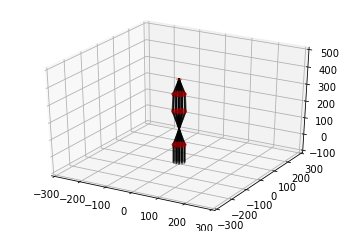

In [4]:
Fig = plt.figure()                                             # Create figure
Ax = Fig.add_subplot(111, projection='3d')                     # Figure 3d projection
Sys.draw(Ax)                                                   # Draw optical system
pap.adjustAspect(Ax, 600, z=200)                                   # Adjust 3D space
plt.show()

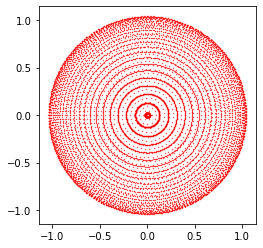

In [5]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                   # Draw spot diagram
plt.show()

In [6]:
MM, Tra = Sys.getSystemMuellerMatrix()                      # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)  

System Mueller matrix is : 
 [[ 1.00000  0.00000  0.00000  0.00000]
 [ 0.00000  1.00000 -0.00000  0.00000]
 [-0.00000 -0.00000  1.00000  0.00000]
 [ 0.00000  0.00000  0.00000  1.00000]]
Throughput is:  0.4689558065272939
